Formatting data for friedman tests


1. Gather data from each result of the experiments
2. Format it in a DF
3. Plot results
4. Friedman test it?



In [72]:
# Libraries and helper functions
import pickle
import json
import sys
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def get_config(file='config.json'):
    with open(file) as cfg_file:  
     return json.load(cfg_file)

def get_all_pso_config_results(cfg):
    # A bit messy. Creates a table of resulted fitness for each algorithm configuration on each month
    with open('./config/algos/pso_configs.json') as cfg_file:  
     pso_cfg = json.load(cfg_file)
    df = pd.DataFrame(columns=['config name','data file','mdd', 'no_of_short_selling_transactions', 'no_of_transactions', 'noop', 'realised_profit', 'ret', 'u_buy', 'u_sell', 'value', 'wealth'])
    for config in pso_cfg:
        for f in cfg['data']['files']:
            fp = pso_cfg[config]['base_results_file_path'] + f + '/pickles/average_fitness.pickle'
            p = pd.Series(pickle.load(open(fp,"rb")), name=(config+' '+f))
            p['config name'] = config
            p['data file'] = f
            df = df.append(p)
    return df


In [79]:
# Load data
cfg = get_config()
pso_configs = get_all_pso_config_results(cfg)

In [75]:
pso_configs.head()
pso_configs.to_csv('results-df.csv', sep=',', mode='a')


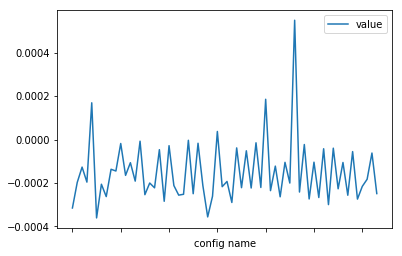

In [83]:
pso_configs.plot(x='config name', y='value')

In [88]:
pso_configs.loc[pso_configs['value'].idxmax()]


config name                                                                     max k
data file                           data/fx-spot_EUR_GBP_10min_201306.txt:fx-spot_...
mdd                                                                       0.000713001
no_of_short_selling_transactions                                                    0
no_of_transactions                                                               34.3
noop                                                                           2034.4
realised_profit                                                               3.46343
ret                                                                       0.000692686
u_buy                                                                               0
u_sell                                                                              0
value                                                                     0.000550086
wealth                                                